In [88]:
import geopandas as gpd
b = gpd.read_file('gu\gu.shp')
gu = b[['SIG_CD','SIG_ENG_NM']]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import zipfile
curDir = os.getcwd()
zf = zipfile.ZipFile(curDir + '\\LOCAL_PEOPLE_201903.zip')
text_files = zf.infolist()
list_ = []
for text_file in text_files:
    print(text_file.filename)
    df = pd.read_csv(zf.open(text_file.filename), usecols=[0,1,2,3,4])
    list_.append(df)
df = pd.concat(list_)
df = df[['기준일ID','시간대구분','행정동코드','집계구코드','총생활인구수']]
df['gu'] = [str(x)[:5] for x in df['행정동코드']]
df = df.merge(gu, how='left', left_on='gu', right_on='SIG_CD')
df = df[['기준일ID','시간대구분','행정동코드','집계구코드','총생활인구수','SIG_ENG_NM']]
df = df.groupby(['기준일ID','시간대구분','SIG_ENG_NM'])['총생활인구수'].agg('sum')
df = df.reset_index()
df['기준일ID'] = df['기준일ID'].astype(str)
df['date'] = [x[6:] for x in df['기준일ID']]
df.columns = ['wholedate','hour','gu','floating population','date']

LOCAL_PEOPLE_20190324.csv
LOCAL_PEOPLE_20190313.csv
LOCAL_PEOPLE_20190319.csv
LOCAL_PEOPLE_20190301.csv
LOCAL_PEOPLE_20190307.csv
LOCAL_PEOPLE_20190321.csv
LOCAL_PEOPLE_20190302.csv
LOCAL_PEOPLE_20190308.csv
LOCAL_PEOPLE_20190331.csv
LOCAL_PEOPLE_20190312.csv
LOCAL_PEOPLE_20190330.csv
LOCAL_PEOPLE_20190315.csv
LOCAL_PEOPLE_20190314.csv
LOCAL_PEOPLE_20190325.csv
LOCAL_PEOPLE_20190306.csv
LOCAL_PEOPLE_20190320.csv
LOCAL_PEOPLE_20190304.csv
LOCAL_PEOPLE_20190329.csv
LOCAL_PEOPLE_20190317.csv
LOCAL_PEOPLE_20190305.csv
LOCAL_PEOPLE_20190326.csv
LOCAL_PEOPLE_20190328.csv
LOCAL_PEOPLE_20190311.csv
LOCAL_PEOPLE_20190303.csv
LOCAL_PEOPLE_20190318.csv
LOCAL_PEOPLE_20190323.csv
LOCAL_PEOPLE_20190310.csv
LOCAL_PEOPLE_20190322.csv
LOCAL_PEOPLE_20190309.csv
LOCAL_PEOPLE_20190316.csv
LOCAL_PEOPLE_20190327.csv


In [89]:
import geopandas as gpd
b = gpd.read_file('gu\gu.shp')
gu = b[['SIG_CD','SIG_ENG_NM']]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import zipfile
curDir = os.getcwd()
zf = zipfile.ZipFile(curDir + '\\LOCAL_PEOPLE_202003.zip')
text_files = zf.infolist()
list_ = []
for text_file in text_files:
    print(text_file.filename)
    df2 = pd.read_csv(zf.open(text_file.filename), encoding='cp949', usecols=[0,1,2,3,4])
    list_.append(df2)
df2 = pd.concat(list_)
df2 = df2[['?"기준일ID"','시간대구분','행정동코드','집계구코드','총생활인구수']]
df2['gu'] = [str(x)[:5] for x in df2['행정동코드']]
df2 = df2.merge(gu, how='left', left_on='gu', right_on='SIG_CD')
df2 = df2[['?"기준일ID"','시간대구분','행정동코드','집계구코드','총생활인구수','SIG_ENG_NM']]
df2 = df2.groupby(['?"기준일ID"','시간대구분','SIG_ENG_NM'])['총생활인구수'].agg('sum')
df2 = df2.reset_index()
df2['?"기준일ID"'] = df2['?"기준일ID"'].astype(str)
df2['date'] = [x[6:] for x in df2['?"기준일ID"']]
df2.columns = ['wholedate','hour','gu','floating population','date']

LOCAL_PEOPLE_20200309.csv
LOCAL_PEOPLE_20200301.csv
LOCAL_PEOPLE_20200316.csv
LOCAL_PEOPLE_20200311.csv
LOCAL_PEOPLE_20200306.csv
LOCAL_PEOPLE_20200328.csv
LOCAL_PEOPLE_20200329.csv
LOCAL_PEOPLE_20200304.csv
LOCAL_PEOPLE_20200315.csv
LOCAL_PEOPLE_20200324.csv
LOCAL_PEOPLE_20200307.csv
LOCAL_PEOPLE_20200326.csv
LOCAL_PEOPLE_20200318.csv
LOCAL_PEOPLE_20200305.csv
LOCAL_PEOPLE_20200312.csv
LOCAL_PEOPLE_20200314.csv
LOCAL_PEOPLE_20200321.csv
LOCAL_PEOPLE_20200308.csv
LOCAL_PEOPLE_20200327.csv
LOCAL_PEOPLE_20200303.csv
LOCAL_PEOPLE_20200331.csv
LOCAL_PEOPLE_20200317.csv
LOCAL_PEOPLE_20200323.csv
LOCAL_PEOPLE_20200313.csv
LOCAL_PEOPLE_20200330.csv
LOCAL_PEOPLE_20200322.csv
LOCAL_PEOPLE_20200319.csv
LOCAL_PEOPLE_20200320.csv
LOCAL_PEOPLE_20200302.csv
LOCAL_PEOPLE_20200325.csv
LOCAL_PEOPLE_20200310.csv


In [90]:
df = df[(df['wholedate'] != '20190215') & (df['wholedate'] != '20190311')]

In [93]:
nineteen = ['fri','sat','sun','mon','tue','wed','thu']*4 + ['fri','sat','sun']
twenty = ['sun','mon','tue','wed','thu','fri','sat']*4 + ['sun','mon','tue']

In [94]:
del nineteen[10]

In [96]:
nineteen = pd.DataFrame(nineteen)
twenty = pd.DataFrame(twenty)
nineteen['date'] = df['date'].unique()
twenty['date'] = df2['date'].unique()

In [98]:
len(twenty)

31

In [37]:
df = df[['wholedate', 'hour', 'gu', 'floating population', 'date']]

In [38]:
df.head()

,wholedate,hour,gu,floating population,date
0,20190301,0,Dobong-gu,311307.0,01
1,20190301,0,Dongdaemun-gu,367207.0,01
2,20190301,0,Dongjak-gu,430396.0,01
3,20190301,0,Eunpyeong-gu,487360.0,01
4,20190301,0,Gangbuk-gu,330578.0,01


In [39]:
df2 = df[['wholedate', 'hour', 'gu', 'date']]

In [40]:
df2['population difference'] = df7['floating population'] - df['floating population']

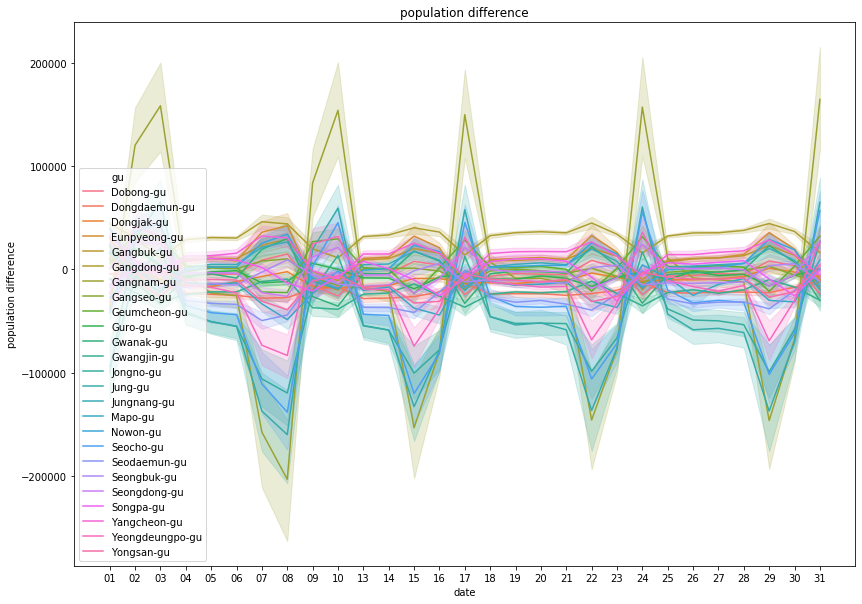

In [41]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(data=df2, x='date', y='population difference',hue = 'gu', ax=ax)
plt.title('population difference')
plt.show()

In [45]:
df['date'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [44]:
df7['date'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [47]:
df3 = df[['hour', 'gu', 'date']]
df3['population difference'] = df7['floating population'] - df['floating population']

C:\Users\Main\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


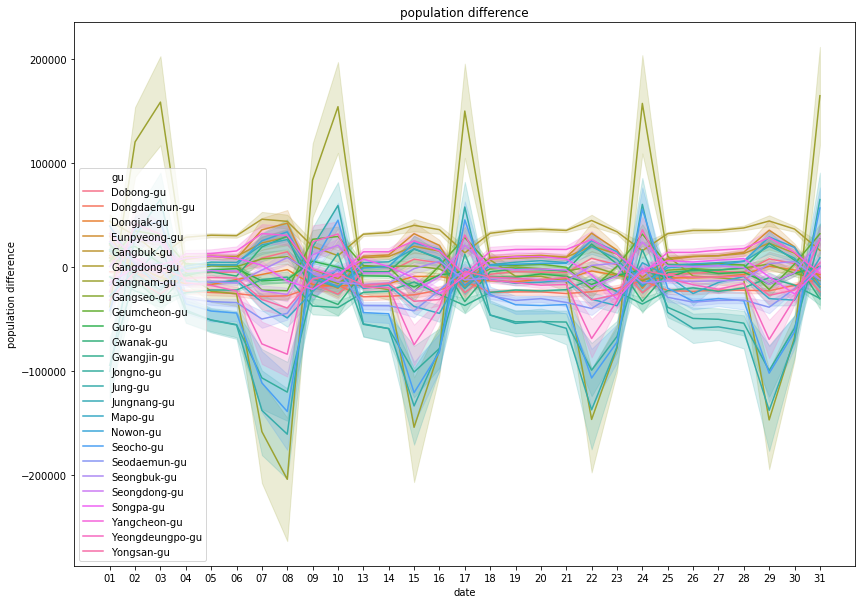

In [48]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(data=df3, x='date', y='population difference',hue = 'gu', ax=ax)
plt.title('population difference')
plt.show()

In [56]:
df['date'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [57]:
df7['date'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [64]:
df7.index = df.index

In [65]:
df3 = df[['hour', 'gu', 'date']]
df3['population difference'] = df7['floating population'] - df['floating population']

C:\Users\Main\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


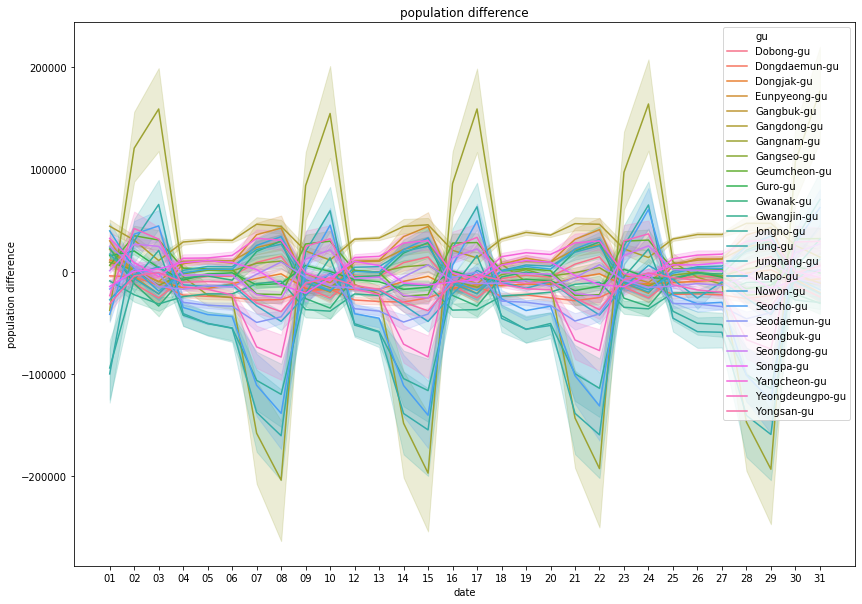

In [66]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(data=df3, x='date', y='population difference',hue = 'gu', ax=ax)
plt.title('population difference')
plt.show()

In [67]:
nineteen = ['fri','sat','sun','mon','tue','wed','thu']*4 + ['fri','sat','sun']
twenty = ['sun','mon','tue','wed','thu','fri','sat']*4 + ['sun','mon','tue']

In [70]:
del twenty[10]

In [71]:
del nineteen[10]

In [76]:
nineteen = pd.DataFrame(nineteen)
twenty = pd.DataFrame(twenty)

In [78]:
nineteen.columns = ['day of week']
twenty.columns = ['day of week']

In [79]:
nineteen['date'] = df['date'].unique()
twenty['date'] = df['date'].unique()

In [99]:
df = df.merge(nineteen, how='left', on='date')
df2 = df2.merge(twenty, how='left', on='date')

In [102]:
df = df[(df['date'] != '27')&(df['date'] != '28')&(df['date'] != '29')&(df['date'] != '30')&(df['date'] != '31')]

In [103]:
df2 = df2[(df2['date'] != '01')&(df2['date'] != '02')&(df2['date'] != '03')&(df2['date'] != '04')&(df2['date'] != '05')&(df2['date'] != '16')]

In [104]:
len(df)

15000

In [105]:
len(df2)

15000

In [112]:
df.columns = ['wholedate', 'hour', 'gu', 'floating population', 'date', 'day of week']
df2.columns = ['wholedate', 'hour', 'gu', 'floating population', 'date', 'day of week']

In [109]:
df2.tail()

,wholedate,hour,gu,floating population,date,0
18595,20200331,23,Seongdong-gu,339642.5809,31,tue
18596,20200331,23,Songpa-gu,767908.9090,31,tue
18597,20200331,23,Yangcheon-gu,428731.9701,31,tue
18598,20200331,23,Yeongdeungpo-gu,416361.2190,31,tue
18599,20200331,23,Yongsan-gu,265864.1473,31,tue


In [113]:
df3 = df[['hour', 'gu','floating population', 'day of week']]

In [114]:
df3['population difference'] = df2['floating population'] - df['floating population']

C:\Users\Main\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14990, 14991, 14992, 14993, 14994, 14995, 14996, 14997, 14998,
            14999],
           dtype='int64', length=15000)

In [118]:
df2.index = df.index

In [150]:
df3['day of week'].unique()

array(['fri', 'sat', 'sun', 'mon', 'tue', 'wed', 'thu'], dtype=object)

In [120]:
df3 = df[['hour', 'gu','floating population', 'day of week']]
df3['population difference'] = df2['floating population'] - df['floating population']

C:\Users\Main\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


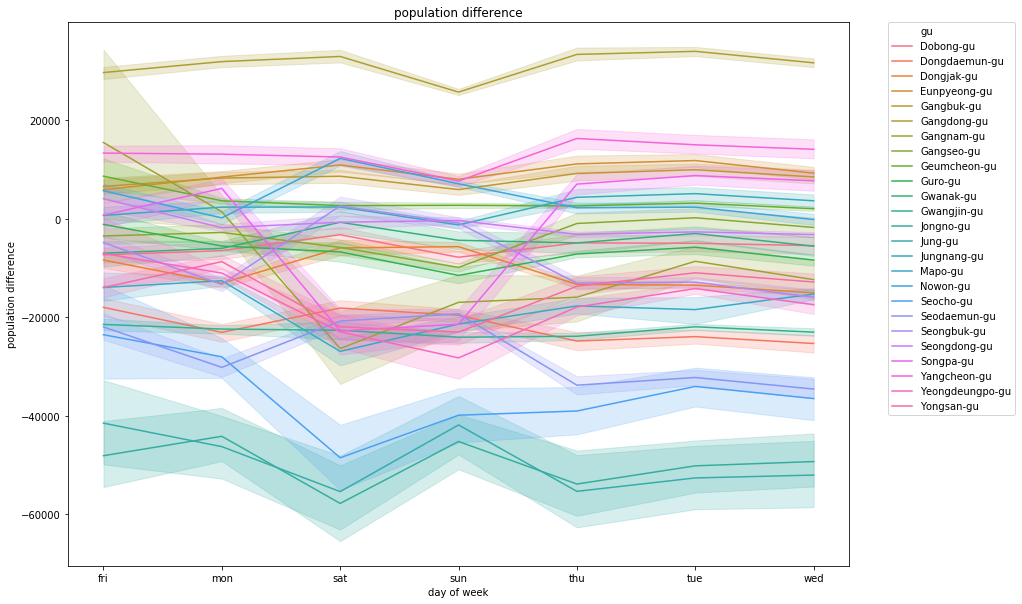

In [121]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(data=df3, x='day of week', y='population difference',hue = 'gu', ax=ax)
plt.title('population difference')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

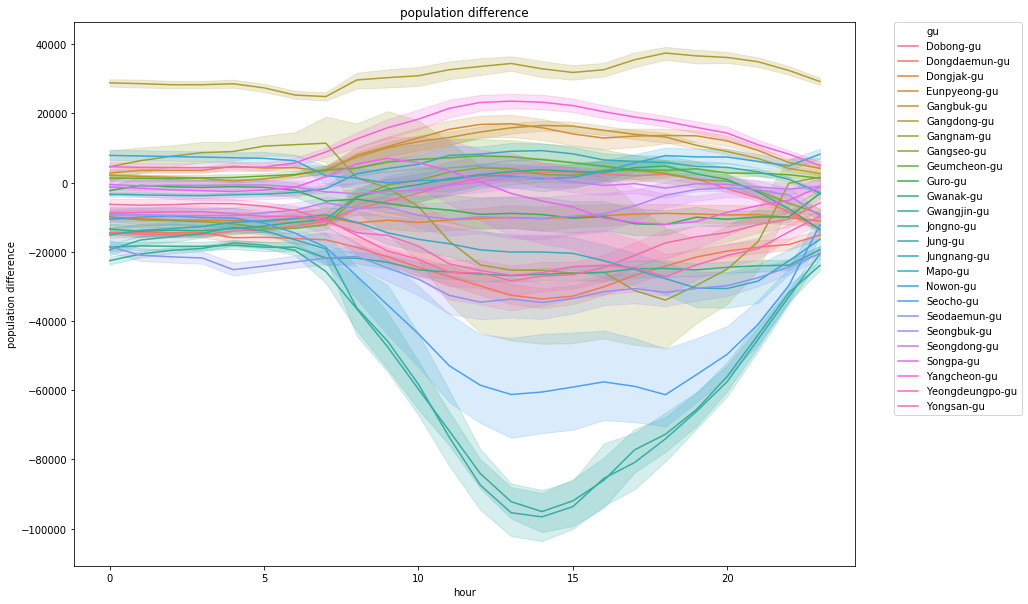

In [124]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(data=df3, x='hour', y='population difference',hue = 'gu', ax=ax)
plt.title('population difference')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [151]:
weekday = df3[(df3['day of week'] != 'sat')&(df3['day of week'] != 'sun')]
weekend = df3[(df3['day of week'] == 'sat')|(df3['day of week'] == 'sun')]

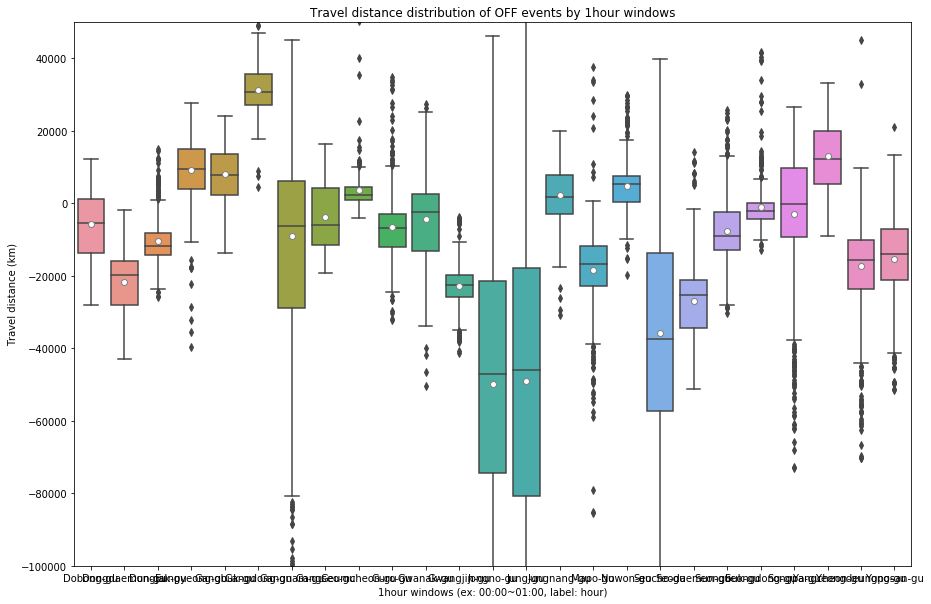

In [133]:
import seaborn as sns
plt.figure(figsize=(15,10))
g = sns.boxplot(x='gu', y="population difference", data=df3, showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"gray"})
plt.title("Travel distance distribution of OFF events by 1hour windows") # (from 00:05)
plt.xlabel("1hour windows (ex: 00:00~01:00, label: hour)")
plt.ylabel("Travel distance (km)")
g.axes.set_ylim(-100000,50000)

plt.show()

In [135]:
weekday.head()

,hour,gu,floating population,day of week,population difference
0,0,Dobong-gu,311307.0,fri,-9460.9927
1,0,Dongdaemun-gu,367207.0,fri,-5824.8394
2,0,Dongjak-gu,430396.0,fri,520.0809
3,0,Eunpyeong-gu,487360.0,fri,6921.2639
4,0,Gangbuk-gu,330578.0,fri,3824.4184


In [136]:
weekday = weekday[['hour','gu','day of week', 'population difference']]
weekend = weekend[['hour','gu','day of week', 'population difference']]

In [137]:
weekday = weekday.groupby(['hour','gu'])['population difference'].mean().reset_index()

In [138]:
weekday.head()

,hour,gu,population difference
0,0,Dobong-gu,-15100.936894
1,0,Dongdaemun-gu,-15254.267035
2,0,Dongjak-gu,-12028.314876
3,0,Eunpyeong-gu,2571.033071
4,0,Gangbuk-gu,2315.195453


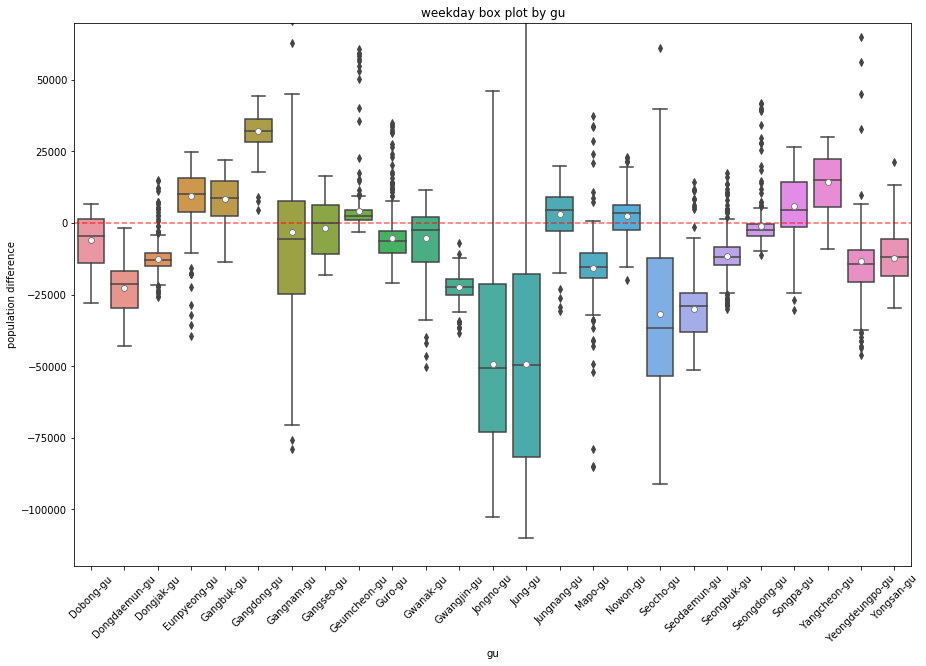

In [170]:
import seaborn as sns
plt.figure(figsize=(15,10))
g = sns.boxplot(x='gu', y="population difference", data=weekday, showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"gray"})
plt.title("weekday box plot by gu") # (from 00:05)
plt.xlabel("gu")
plt.ylabel("population difference")
plt.xticks(rotation=45)
g.axes.set_ylim(-120000,70000)
plt.axhline(y = 0, color = 'r', ls = '--', alpha = 0.6)
plt.show()

In [152]:
weekend = weekend.groupby(['hour','gu'])['population difference'].mean().reset_index()

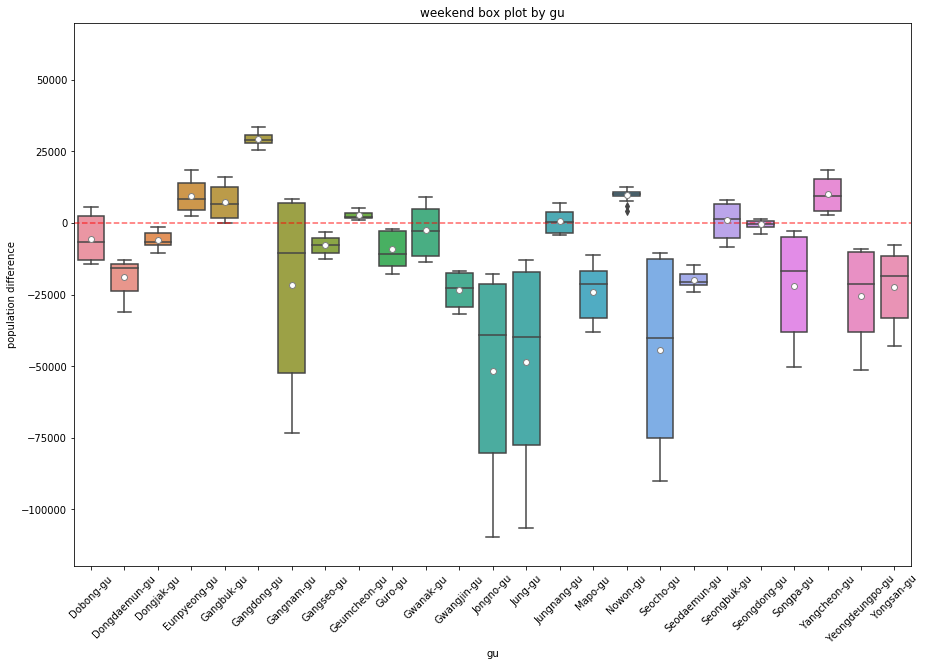

In [169]:
import seaborn as sns
plt.figure(figsize=(15,10))
g = sns.boxplot(x='gu', y="population difference", data=weekend, showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"gray"})
plt.title("weekend box plot by gu") # (from 00:05)
plt.xlabel("gu")
plt.ylabel("population difference")
plt.xticks(rotation=45)
g.axes.set_ylim(-120000,70000)
plt.axhline(y = 0, color = 'r', ls = '--', alpha = 0.6)
plt.show()

In [171]:
import geopandas as gpd
b = gpd.read_file('gu\gu.shp')
gu = b[['SIG_CD','SIG_ENG_NM']]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import zipfile
curDir = os.getcwd()
zf = zipfile.ZipFile(curDir + '\\LOCAL_PEOPLE_201903.zip')
text_files = zf.infolist()
list_ = []
for text_file in text_files:
    print(text_file.filename)
    df3 = pd.read_csv(zf.open(text_file.filename), usecols=[0,1,2,3,4])
    list_.append(df3)
df3 = pd.concat(list_)
df3 = df3[['기준일ID','시간대구분','행정동코드','집계구코드','총생활인구수']]
df3['gu'] = [str(x)[:5] for x in df3['행정동코드']]
df3 = df3.merge(gu, how='left', left_on='gu', right_on='SIG_CD')
df3 = df3[['기준일ID','시간대구분','행정동코드','집계구코드','총생활인구수','SIG_ENG_NM']]

LOCAL_PEOPLE_20190324.csv
LOCAL_PEOPLE_20190313.csv
LOCAL_PEOPLE_20190319.csv
LOCAL_PEOPLE_20190301.csv
LOCAL_PEOPLE_20190307.csv
LOCAL_PEOPLE_20190321.csv
LOCAL_PEOPLE_20190302.csv
LOCAL_PEOPLE_20190308.csv
LOCAL_PEOPLE_20190331.csv
LOCAL_PEOPLE_20190312.csv
LOCAL_PEOPLE_20190330.csv
LOCAL_PEOPLE_20190315.csv
LOCAL_PEOPLE_20190314.csv
LOCAL_PEOPLE_20190325.csv
LOCAL_PEOPLE_20190306.csv
LOCAL_PEOPLE_20190320.csv
LOCAL_PEOPLE_20190304.csv
LOCAL_PEOPLE_20190329.csv
LOCAL_PEOPLE_20190317.csv
LOCAL_PEOPLE_20190305.csv
LOCAL_PEOPLE_20190326.csv
LOCAL_PEOPLE_20190328.csv
LOCAL_PEOPLE_20190311.csv
LOCAL_PEOPLE_20190303.csv
LOCAL_PEOPLE_20190318.csv
LOCAL_PEOPLE_20190323.csv
LOCAL_PEOPLE_20190310.csv
LOCAL_PEOPLE_20190322.csv
LOCAL_PEOPLE_20190309.csv
LOCAL_PEOPLE_20190316.csv
LOCAL_PEOPLE_20190327.csv


In [173]:
import geopandas as gpd
b = gpd.read_file('gu\gu.shp')
gu = b[['SIG_CD','SIG_ENG_NM']]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import zipfile
curDir = os.getcwd()
zf = zipfile.ZipFile(curDir + '\\LOCAL_PEOPLE_202003.zip')
text_files = zf.infolist()
list_ = []
for text_file in text_files:
    print(text_file.filename)
    df4 = pd.read_csv(zf.open(text_file.filename), encoding='cp949', usecols=[0,1,2,3,4])
    list_.append(df4)
df4 = pd.concat(list_)
df4 = df4[['?"기준일ID"','시간대구분','행정동코드','집계구코드','총생활인구수']]
df4['gu'] = [str(x)[:5] for x in df4['행정동코드']]
df4 = df4.merge(gu, how='left', left_on='gu', right_on='SIG_CD')
df4 = df4[['?"기준일ID"','시간대구분','행정동코드','집계구코드','총생활인구수','SIG_ENG_NM']]

LOCAL_PEOPLE_20200309.csv
LOCAL_PEOPLE_20200301.csv
LOCAL_PEOPLE_20200316.csv
LOCAL_PEOPLE_20200311.csv
LOCAL_PEOPLE_20200306.csv
LOCAL_PEOPLE_20200328.csv
LOCAL_PEOPLE_20200329.csv
LOCAL_PEOPLE_20200304.csv
LOCAL_PEOPLE_20200315.csv
LOCAL_PEOPLE_20200324.csv
LOCAL_PEOPLE_20200307.csv
LOCAL_PEOPLE_20200326.csv
LOCAL_PEOPLE_20200318.csv
LOCAL_PEOPLE_20200305.csv
LOCAL_PEOPLE_20200312.csv
LOCAL_PEOPLE_20200314.csv
LOCAL_PEOPLE_20200321.csv
LOCAL_PEOPLE_20200308.csv
LOCAL_PEOPLE_20200327.csv
LOCAL_PEOPLE_20200303.csv
LOCAL_PEOPLE_20200331.csv
LOCAL_PEOPLE_20200317.csv
LOCAL_PEOPLE_20200323.csv
LOCAL_PEOPLE_20200313.csv
LOCAL_PEOPLE_20200330.csv
LOCAL_PEOPLE_20200322.csv
LOCAL_PEOPLE_20200319.csv
LOCAL_PEOPLE_20200320.csv
LOCAL_PEOPLE_20200302.csv
LOCAL_PEOPLE_20200325.csv
LOCAL_PEOPLE_20200310.csv


In [174]:
df3 = df3.groupby(['기준일ID','시간대구분','행정동코드'])['총생활인구수'].agg('sum')
df3 = df3.reset_index()
df3['기준일ID'] = df3['기준일ID'].astype(str)
df3['date'] = [x[6:] for x in df3['기준일ID']]

In [176]:
df3['gu'] = [str(x)[:5] for x in df3['행정동코드']]
df3 = df3.merge(gu, how='left', left_on='gu', right_on='SIG_CD')

In [178]:
df3 = df3[['기준일ID','시간대구분','행정동코드','총생활인구수','date','SIG_ENG_NM']]

In [181]:
gangnam1 = df3[df3['SIG_ENG_NM'] == 'Gangnam-gu']

In [183]:
df4 = df4.groupby(['?"기준일ID"','시간대구분','행정동코드'])['총생활인구수'].agg('sum')
df4 = df4.reset_index()
df4['?"기준일ID"'] = df4['?"기준일ID"'].astype(str)
df4['date'] = [x[6:] for x in df4['?"기준일ID"']]
df4['gu'] = [str(x)[:5] for x in df4['행정동코드']]
df4 = df4.merge(gu, how='left', left_on='gu', right_on='SIG_CD')
df4 = df4[['?"기준일ID"','시간대구분','행정동코드','총생활인구수','date','SIG_ENG_NM']]
gangnam2 = df4[df4['SIG_ENG_NM'] == 'Gangnam-gu']

In [184]:
gangnam1.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,date,SIG_ENG_NM
357,20190215,0,11680510,53174.0,15,Gangnam-gu
358,20190215,0,11680521,76320.0,15,Gangnam-gu
359,20190215,0,11680531,72180.0,15,Gangnam-gu
360,20190215,0,11680545,74692.0,15,Gangnam-gu
361,20190215,0,11680565,76416.0,15,Gangnam-gu


In [185]:
gangnam2.head()

,"?""기준일ID""",시간대구분,행정동코드,총생활인구수,date,SIG_ENG_NM
357,20200301,0,11680510,25115.1469,01,Gangnam-gu
358,20200301,0,11680521,36724.2181,01,Gangnam-gu
359,20200301,0,11680531,31090.3909,01,Gangnam-gu
360,20200301,0,11680545,33912.3802,01,Gangnam-gu
361,20200301,0,11680565,34502.4686,01,Gangnam-gu


In [186]:
gangnam1 = gangnam1[(gangnam1['기준일ID'] != '20190215') & (gangnam1['기준일ID'] != '20190311')]

In [187]:
nineteen = ['fri','sat','sun','mon','tue','wed','thu']*4 + ['fri','sat','sun']
twenty = ['sun','mon','tue','wed','thu','fri','sat']*4 + ['sun','mon','tue']
del nineteen[10]
nineteen = pd.DataFrame(nineteen)
twenty = pd.DataFrame(twenty)
nineteen['date'] = gangnam1['date'].unique()
twenty['date'] = gangnam2['date'].unique()

In [188]:
gangnam1 = gangnam1.merge(nineteen, how='left', on='date')
gangnam2 = gangnam2.merge(twenty, how='left', on='date')

In [189]:
gangnam1 = gangnam1[(gangnam1['date'] != '27')&(gangnam1['date'] != '28')&(gangnam1['date'] != '29')&(gangnam1['date'] != '30')&(gangnam1['date'] != '31')]
gangnam2 = gangnam2[(gangnam2['date'] != '01')&(gangnam2['date'] != '02')&(gangnam2['date'] != '03')&(gangnam2['date'] != '04')&(gangnam2['date'] != '05')&(gangnam2['date'] != '16')]

In [192]:
len(gangnam1)

13200

In [193]:
len(gangnam2)

13200

In [194]:
gangnam1.columns = ['wholedate', 'hour', 'dong_code', 'floating population', 'date', 'SIG_ENG_NM', 'day of week']
gangnam2.columns = ['wholedate', 'hour', 'dong_code', 'floating population', 'date', 'SIG_ENG_NM', 'day of week']
gangnam2.index = gangnam1.index
gangnam = gangnam1[['hour', 'dong_code', 'day of week']]
gangnam['population difference'] = gangnam2['floating population'] - gangnam1['floating population']

C:\Users\Main\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [196]:
gangnam['date'] = gangnam1['date']

C:\Users\Main\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
gangnam.head()

,hour,dong_code,day of week,population difference,date
0,0,11680510,fri,-3036.6723,01
1,0,11680521,fri,-2186.1062,01
2,0,11680531,fri,-3101.6722,01
3,0,11680545,fri,-3528.7353,01
4,0,11680565,fri,-2930.5519,01


In [199]:
gang_weekday = gangnam[(gangnam['day of week'] != 'sat')&(gangnam['day of week'] != 'sun')]
gang_weekend = gangnam[(gangnam['day of week'] == 'sat')|(gangnam['day of week'] == 'sun')]
gang_weekday = gang_weekday[['hour','dong_code','day of week', 'population difference']]
gang_weekend = gang_weekend[['hour','dong_code','day of week', 'population difference']]
gang_weekday = gang_weekday.groupby(['hour','dong_code'])['population difference'].mean().reset_index()
gang_weekend = gang_weekend.groupby(['hour','dong_code'])['population difference'].mean().reset_index()

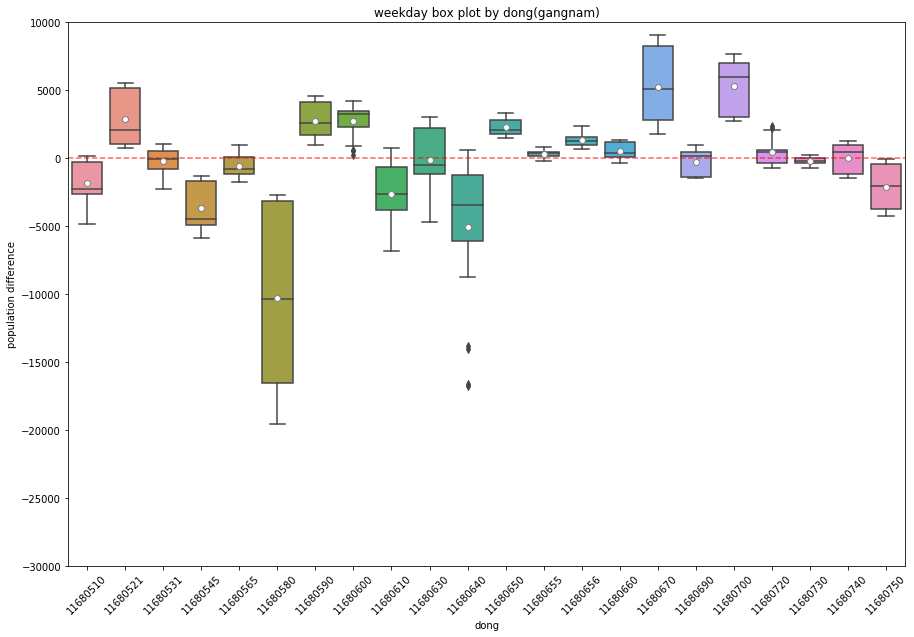

In [202]:
import seaborn as sns
plt.figure(figsize=(15,10))
g = sns.boxplot(x='dong_code', y="population difference", data=gang_weekday, showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"gray"})
plt.title("weekday box plot by dong(gangnam)") # (from 00:05)
plt.xlabel("dong")
plt.ylabel("population difference")
plt.xticks(rotation=45)
g.axes.set_ylim(-30000,10000)
plt.axhline(y = 0, color = 'r', ls = '--', alpha = 0.6)
plt.show()

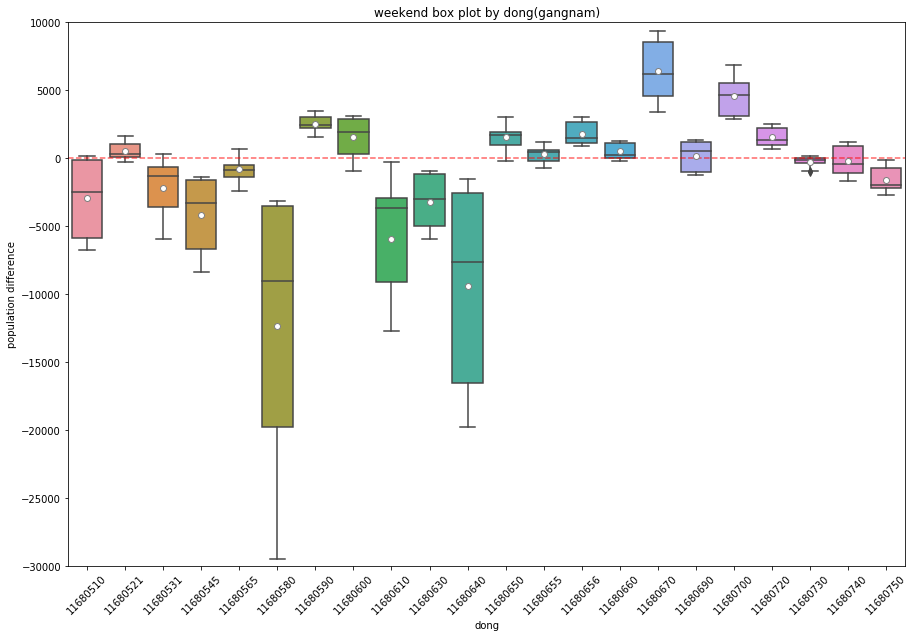

In [203]:
import seaborn as sns
plt.figure(figsize=(15,10))
g = sns.boxplot(x='dong_code', y="population difference", data=gang_weekend, showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"gray"})
plt.title("weekend box plot by dong(gangnam)") # (from 00:05)
plt.xlabel("dong")
plt.ylabel("population difference")
plt.xticks(rotation=45)
g.axes.set_ylim(-30000,10000)
plt.axhline(y = 0, color = 'r', ls = '--', alpha = 0.6)
plt.show()

In [206]:
gangnam.head()

,hour,dong_code,day of week,population difference,date
0,0,11680510,fri,-3036.6723,01
1,0,11680521,fri,-2186.1062,01
2,0,11680531,fri,-3101.6722,01
3,0,11680545,fri,-3528.7353,01
4,0,11680565,fri,-2930.5519,01


In [207]:
gang_hour = gangnam.groupby(['hour','dong_code'])['population difference'].mean().reset_index()
gang_date = gangnam.groupby(['date','dong_code'])['population difference'].mean().reset_index()

In [208]:
gang_hour.head()

,hour,dong_code,population difference
0,0,11680510,-231.296264
1,0,11680521,723.058360
2,0,11680531,-843.145444
3,0,11680545,-1636.495720
4,0,11680565,-1231.907140


In [213]:
gang_hour.head()

,hour,dong_code,population difference
0,0,11680510,-231.296264
1,0,11680521,723.058360
2,0,11680531,-843.145444
3,0,11680545,-1636.495720
4,0,11680565,-1231.907140


In [214]:
gang_date.head()

,date,dong_code,population difference
0,01,11680510,3697.936404
1,01,11680521,9251.407737
2,01,11680531,11528.630983
3,01,11680545,3740.559063
4,01,11680565,5373.525767


In [218]:
import numpy as np
ganghour_array = np.zeros((len(gang_hour['hour'].unique()), len(gang_hour['dong_code'].unique())))
for i, hour in enumerate(gang_hour['hour'].unique()):
    for j, dong in enumerate(gang_hour['dong_code'].unique()):
        ganghour_array[i][j] = gang_hour[(gang_hour['hour'] == hour) & (gang_hour['dong_code'] == dong)]['population difference']

In [221]:
np.max(ganghour_array)

9128.309388

In [222]:
len(gang_hour['hour'].unique())

24

In [224]:
len(gang_hour['dong_code'].unique())

22

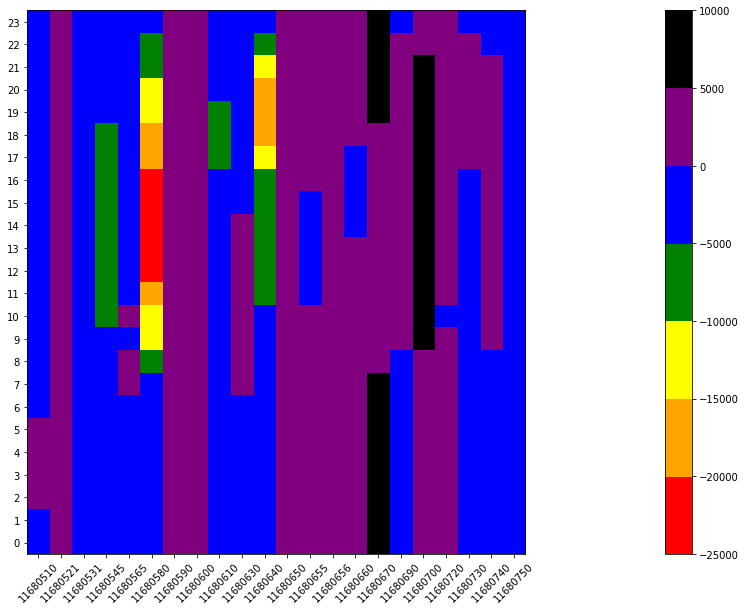

In [242]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
fig, ax = plt.subplots(1,1,figsize=(50,10))
cmap = colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black'])
bounds=[-25000, -20000, -15000, -10000, -5000, 0, 5000, 10000]
norm = colors.BoundaryNorm(bounds, cmap.N)
img = ax.imshow(ganghour_array, extent=[0,22,0,24], origin='lower', cmap=cmap, norm=norm)
ax.set_xticks(np.linspace(0.5, 21.5, 22))
ax.set_yticks(np.linspace(0.5, 23.5, 24))

ax.set_xticklabels(gang_hour['dong_code'].unique())
ax.set_yticklabels(gang_hour['hour'].unique())
plt.xticks(rotation=45)
fig.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-25000, -20000, -15000, -10000, -5000, 0, 5000, 10000])
plt.show()

In [243]:
df3.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,date,SIG_ENG_NM
0,20190215,0,11110515,29302.0,15,Jongno-gu
1,20190215,0,11110530,33424.0,15,Jongno-gu
2,20190215,0,11110540,9304.0,15,Jongno-gu
3,20190215,0,11110550,25890.0,15,Jongno-gu
4,20190215,0,11110560,43938.0,15,Jongno-gu


In [244]:
df4.head()

,"?""기준일ID""",시간대구분,행정동코드,총생활인구수,date,SIG_ENG_NM
0,20200301,0,11110515,14313.9879,01,Jongno-gu
1,20200301,0,11110530,13402.6498,01,Jongno-gu
2,20200301,0,11110540,4383.4946,01,Jongno-gu
3,20200301,0,11110550,16065.6167,01,Jongno-gu
4,20200301,0,11110560,19490.5061,01,Jongno-gu


In [245]:
df3.columns = ['wholedate','hour','dong_code','floating population','date','SIG_ENG_NM']
df3.columns = ['wholedate','hour','dong_code','floating population','date','SIG_ENG_NM']

In [246]:
df3 = df3.merge(nineteen, how='left', on='date')
df4 = df4.merge(twenty, how='left', on='date')
df3 = df3[(df3['date'] != '27')&(df3['date'] != '28')&(df3['date'] != '29')&(df3['date'] != '30')&(df3['date'] != '31')]
df4 = df4[(df4['date'] != '01')&(df4['date'] != '02')&(df4['date'] != '03')&(df4['date'] != '04')&(df4['date'] != '05')&(df4['date'] != '16')]

In [260]:
df3.head()

,wholedate,hour,dong_code,floating population,date,SIG_ENG_NM,0
10176,20190301,0,11110515,13561.0,01,Jongno-gu,fri
10177,20190301,0,11110530,17631.0,01,Jongno-gu,fri
10178,20190301,0,11110540,4739.0,01,Jongno-gu,fri
10179,20190301,0,11110550,13194.0,01,Jongno-gu,fri
10180,20190301,0,11110560,21567.0,01,Jongno-gu,fri


In [255]:
len(df4)

254400

In [257]:
df3 = df3[(df3['wholedate'] != '20190215') & (df3['wholedate'] != '20190311')]

In [261]:
df4.index = df3.index
wholedong = df3[['hour', 'dong_code','date']]
wholedong['population difference'] = df4['floating population'] - df3['floating population']

C:\Users\Main\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [262]:
wholedong.head()

,hour,dong_code,date,population difference
10176,0,11110515,01,1208.1232
10177,0,11110530,01,-3221.0521
10178,0,11110540,01,-223.0293
10179,0,11110550,01,2779.3610
10180,0,11110560,01,-2013.2561


In [263]:
wholedong_hour = wholedong.groupby(['hour','dong_code'])['population difference'].mean().reset_index()

In [264]:
wholedong_hour.head()

,hour,dong_code,population difference
0,0,11110515,420.767672
1,0,11110530,-2195.747328
2,0,11110540,-463.433824
3,0,11110550,2687.918240
4,0,11110560,-2547.588628


In [265]:
wholedong_array = np.zeros((len(wholedong_hour['hour'].unique()), len(wholedong_hour['dong_code'].unique())))
for i, hour in enumerate(wholedong_hour['hour'].unique()):
    for j, dong in enumerate(wholedong_hour['dong_code'].unique()):
        wholedong_array[i][j] = wholedong_hour[(wholedong_hour['hour'] == hour) & (wholedong_hour['dong_code'] == dong)]['population difference']

In [266]:
np.max(wholedong_array)

10567.710375999999

In [267]:
np.min(wholedong_array)

-37569.174616000004

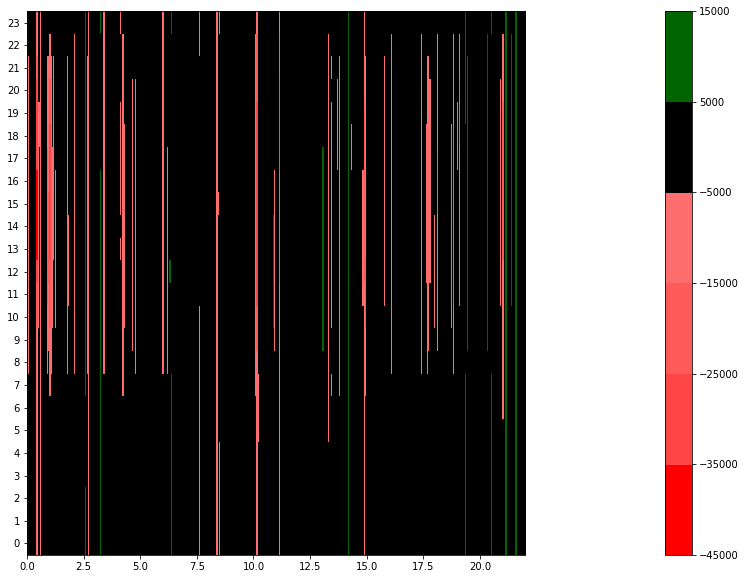

In [270]:
fig, ax = plt.subplots(1,1,figsize=(50,10))
cmap = colors.ListedColormap(['#FF0000','#FF4646','#FF5A5A','#FF6E6E','black','#006400'])
bounds=[-45000, -35000, -25000, -15000, -5000, 5000, 15000]
norm = colors.BoundaryNorm(bounds, cmap.N)
img = ax.imshow(wholedong_array, extent=[0,22,0,24], origin='lower', cmap=cmap, norm=norm)
ax.set_yticks(np.linspace(0.5, 23.5, 24))
ax.set_yticklabels(gang_hour['hour'].unique())
fig.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-45000, -35000, -25000, -15000, -5000, 5000, 15000])
plt.show()

In [272]:
np.save('dong_hour_populationdifference',wholedong_array)

In [273]:
np.savetxt("dong_hour_populationdifference.csv", wholedong_array, delimiter=",")

In [274]:
dataframe = pd.DataFrame(wholedong_array)

In [277]:
len(dataframe)

24

In [278]:
dataframe.to_csv('dong_hour_populationdifference1.csv')

In [279]:
wholedong_date = wholedong.groupby(['date','dong_code'])['population difference'].mean().reset_index()

In [280]:
wholedong_array1 = np.zeros((len(wholedong_date['date'].unique()), len(wholedong_date['dong_code'].unique())))
for i, date in enumerate(wholedong_date['date'].unique()):
    for j, dong in enumerate(wholedong_date['dong_code'].unique()):
        wholedong_array1[i][j] = wholedong_date[(wholedong_date['date'] == date) & (wholedong_date['dong_code'] == dong)]['population difference']

In [282]:
np.min(wholedong_array1)

-29967.585433333337

In [283]:
np.shape(wholedong_array1)

(25, 424)

In [285]:
dataframe1 = pd.DataFrame(wholedong_array1)

In [286]:
len(dataframe1)

25

In [287]:
dataframe1.to_csv('dong_date_populationdifference.csv')

In [288]:
wholedong_date['date'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26'], dtype=object)